In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from general_plot import *



model_name = model_name_list[2] # Simple: 
all_mutants = list_dir(join_path("merged_mutants", f'{system_map[model_name][0]}'))

print(all_mutants)



['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']


In [2]:
bes_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_loops.csv'))
rand_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_loops.csv'))

bes_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_no_loops.csv'))
rand_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_no_loops.csv'))

dfs = (bes_lo_k_csv, rand_lo_k_csv, bes_no_lo_k_csv, rand_no_lo_k_csv)

In [3]:
#calculate mutation score for each model = killed / all mutants
ms_bes_l = get_mutation_score(bes_lo_k_csv, all_mutants)
ms_rand_l = get_mutation_score(rand_lo_k_csv, all_mutants)
ms_bes_no_l = get_mutation_score(bes_no_lo_k_csv, all_mutants)
ms_rand_no_l = get_mutation_score(rand_no_lo_k_csv, all_mutants)

print(f'mutation score for bes_loop in model {model_name}: {ms_bes_l[1]} of {ms_bes_l[2]} = {ms_bes_l[0]*100}%')
print(f'mutation score for rand_loop in model {model_name}: {ms_rand_l[1]} of {ms_rand_l[2]} = {ms_rand_l[0]*100}%')
print(f'mutation score for bes_no_loop in model {model_name}: {ms_bes_no_l[1]} of {ms_bes_no_l[2]} = {ms_bes_no_l[0]*100}%')                    
print(f'mutation score for rand_no_loop in model {model_name}: {ms_rand_no_l[1]} of {ms_rand_no_l[2]} = {ms_rand_no_l[0]*100}%')




mutation score for bes_loop in model SimpleModel: 7 of 10 = 70.0%
mutation score for rand_loop in model SimpleModel: 7 of 10 = 70.0%
mutation score for bes_no_loop in model SimpleModel: 2 of 10 = 20.0%
mutation score for rand_no_loop in model SimpleModel: 7 of 10 = 70.0%


In [4]:
m_lists = get_killed_mutant_all(dfs)
(bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list) = m_lists 


title = f"The different algorithms' performance on killed mutant for {model_name_to_view_list[2]}"
d_map = {
    'bar_width' : 0.5, 
    'x_distance': 3,
    'fig_width' : 15,
    'fig_hight' : 5,
    'x_lim' : 20,
    'y_lim' : 8.5,
    
    'x_label': 'Killed mutant number', 
    'y_label': 'UnKnown', 
    'title': f"The different algorithms' performance on killed mutant for {model_name_to_view_list[2]}",
    
    'bes_l_label': 'BESL',
    'random_l_label': 'RS (cor. to BESL)',
    'bes_no_l_label': 'BESnL',
    'random_no_l_label': 'RS (cor. to BESnL)' ,
    
    'model_name': model_name, 
    'comp_type' : "unknown"
    
    
}




labels: ['2', '3', '4', '5', '6', '7', '9']
mutant 2 not_found
mutant 3 not_found
mutant 4 not_found
mutant 5 not_found
mutant 6 not_found
over_bound_list: ({('6', 6, 55, 0, 1), ('4', 6, 37, 0, 2)}, {'6', '4'})
*****************************
\begin{table}[actual_tests]
\begin{tabular}{|c|c|c|c|c|}
\hline
& BES (Loops) & Random (Loops) & BES (no self loop) & Random (no self loop) \\ \hline
6 & 6    & 55         & TIMEOUT       & 1          \\ \hline
4 & 6    & 37         & TIMEOUT       & 2          \\ \hline
\end{tabular}
\end{table}
*****************************

labels: ['2', '3', '5', '7', '9']
mutant 2 not_found
mutant 3 not_found
mutant 5 not_found
bes_l data: ([6, 6, 6, 5, 5], [0, 0, 0, 0, 0])
rand_l data: ([1, 2, 1, 2, 1], [0, 0, 0, 0, 0])
bes_no_l data: ([0, 0, 0, 4, 4], [120, 120, 120, 0, 0])
rand_no_l data: ([2, 4, 2, 1, 1], [0, 0, 0, 0, 0])


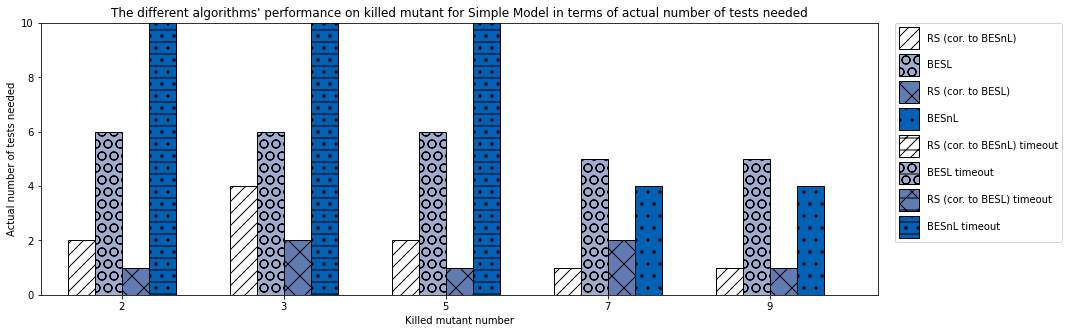

In [5]:

#################################
## Manually:
#################################

# actual_size

# desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'actual_tests'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

over_bound_list = get_over_bound_element(c_lists, desired_mutants, 30) #30)
print(f'over_bound_list: {over_bound_list}')
latex = latex_table_maker(creteria, over_bound_list[0])
print("*****************************")
print(latex)
print("*****************************")
print()

new_desired_mutants = extract_desired_without_over_bound(desired_mutants, over_bound_list[1])
labels = new_desired_mutants
print(f'labels: {labels}')

c_lists = get_cretiera_all_desired_m(dfs, new_desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists





d_map['y_label'] = "Actual number of tests needed"
d_map['comp_type'] = creteria
d_map['x_lim'] = 14 #14
d_map['y_lim'] = 10 #8
d_map['title'] = f"{title} in terms of {d_map['y_label'].lower()}"


plot_4_bars(labels, c_lists, d_map)


labels: ['2', '3', '4', '5', '6', '7', '9']
mutant 2 not_found
mutant 3 not_found
mutant 4 not_found
mutant 5 not_found
mutant 6 not_found
bes_l data: ([1.9442777633666992, 2.215441942214966, 1.6338160037994385, 1.951519012451172, 2.050824880599976, 1.7891972064971924, 1.1848089694976809], [0, 0, 0, 0, 0, 0, 0])
rand_l data: ([1.490328073501587, 1.176642894744873, 1.2957918643951416, 1.2181129455566406, 1.1836321353912354, 0.9689610004425048, 1.0470991134643557], [0, 0, 0, 0, 0, 0, 0])
bes_no_l data: ([0, 0, 0, 0, 0, 1.6313347816467283, 1.3684818744659424], [120, 120, 120, 120, 120, 0, 0])
rand_no_l data: ([1.3710100650787354, 1.3819539546966553, 1.3581819534301758, 1.3240280151367188, 1.311851978302002, 1.3387887477874756, 1.4837582111358645], [0, 0, 0, 0, 0, 0, 0])


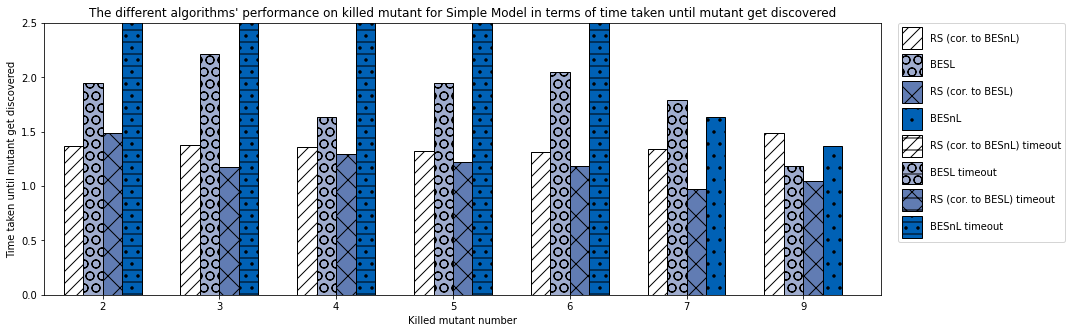

In [6]:
# time_requierd

# desired_mutants = m_lists[0]
desired_mutants = m_lists[0]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'time_taken'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
d_map['x_lim'] = 20
d_map['y_lim'] = 2.5
d_map['title'] = f"{title} in terms of {d_map['y_label'].lower()}"

plot_4_bars(labels, c_lists, d_map)



mutant 2 not_found
mutant 3 not_found
mutant 4 not_found
mutant 5 not_found
mutant 6 not_found


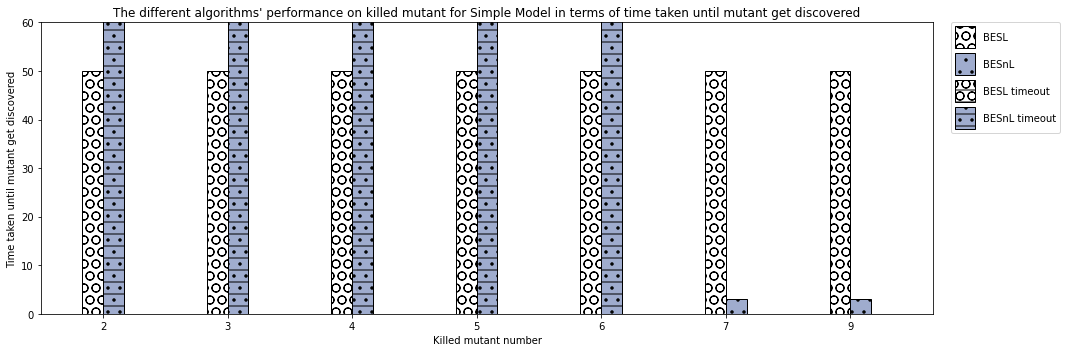

In [7]:
# depth
creteria = 'depth'
c_lists = get_cretiera_only_2(dfs, desired_mutants, creteria, 0)
(bes_lo_c, bes_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' : 25,
d_map['y_lim'] = 60
d_map['title'] = f"{title} in terms of {d_map['y_label'].lower()}"


plot_2_bars(labels, c_lists, d_map)

